# Исследование игровых продуктов

# Цель проекта:
1. описание закономерностей, определяющих успешность игр;
2. выявление популярных продуктов для планирования рекламных кампаний.

<b>Этапы выполнения:</b> 
1. Загрузка данных, анализ общей информации;
2. Предобработка данных: 
* замена названий столбцов;
* преобразование типов данных;
* удаление и замена пропусков и дубликатов;
* подсчет суммарных продаж во всех регионах.
3. Исследовательский анализ данных - описание и визуализация общей информации:
* количество игр по годам;
* анализ платформ по продажам;
* анализ зависимости продаж от отзывов;
* анализ жанров.
4. Составление портрета пользователя по регионам;
4. Формирование общего вывода.

<b>Описание данных:</b> 
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузка данных

In [1]:
#импорт требуемых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")

In [2]:
#записываем в data данные файла


In [3]:
#смотрим первые 10 строк таблицы
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#функция для расчета количесства строк в столбце, количество заполненных и доли пропусков
def df_info(df, str1 = "-------\n", str2 = "\n\n") :
    print(str1)
    df_size = df.size
    not_na_count = df.notna().sum()
    na_count = df.isna().sum()
    dublicated = df.duplicated().sum()
    
    if df_size == na_count:
        print('Данные отсутствуют')
    elif df_size == 0 :
        print('Данные отсутствуют')
    else:
        print(f"size: {df_size}")
        print(f"na_count: {na_count}")
        print(f"not_na_count: {not_na_count}")
        print(f"na_ratio: {(na_count / df_size):.2f}") 
        print(f"duplicated: {dublicated}") 
        print(f"duplicated_ratio: {(dublicated / df_size):.2f}") 
    print(str2)

In [5]:
#создаем функцию для применения предыдущей функции к каждому столбцу 
def data_info (data, col_name):
    print(col_name)
    df_info(data[col_name])

In [6]:
#смотрим результат
for el in data.columns:
    data_info(data, el)
print(data.info())

Name
-------

size: 16715
na_count: 2
not_na_count: 16713
na_ratio: 0.00
duplicated: 5155
duplicated_ratio: 0.31



Platform
-------

size: 16715
na_count: 0
not_na_count: 16715
na_ratio: 0.00
duplicated: 16684
duplicated_ratio: 1.00



Year_of_Release
-------

size: 16715
na_count: 269
not_na_count: 16446
na_ratio: 0.02
duplicated: 16677
duplicated_ratio: 1.00



Genre
-------

size: 16715
na_count: 2
not_na_count: 16713
na_ratio: 0.00
duplicated: 16702
duplicated_ratio: 1.00



NA_sales
-------

size: 16715
na_count: 0
not_na_count: 16715
na_ratio: 0.00
duplicated: 16313
duplicated_ratio: 0.98



EU_sales
-------

size: 16715
na_count: 0
not_na_count: 16715
na_ratio: 0.00
duplicated: 16408
duplicated_ratio: 0.98



JP_sales
-------

size: 16715
na_count: 0
not_na_count: 16715
na_ratio: 0.00
duplicated: 16471
duplicated_ratio: 0.99



Other_sales
-------

size: 16715
na_count: 0
not_na_count: 16715
na_ratio: 0.00
duplicated: 16560
duplicated_ratio: 0.99



Critic_Score
-------

size: 

Таблица содержит 16715 строк и 11 столбцов. \
В столбцах с именем, годом выпуска, жанром, продажами в других странах, оценкой пользователей и рейтингом есть пропуски. \
В следующем шаге проведем обработку данных.

## Предобработка данных

In [7]:
#заменим названия столбцов на более удобные - в нижнем регистре
data = data.rename(columns=lambda x: x.lower())

In [8]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Столбцы с данными по году выпуска и оценкой критиков имеют тип float, хотя логичней было бы использовать int.
При наличии пропусков int из float не получится. Для столбца с данными по годам выпуска мы удалим строки с пропущенными значениями - это один из важных пунктов, которые понадобтся  в дальнейшем и которые мы не сможем обработать (заменить медианой по году, например, не получится). 

In [9]:
#удалим строки с пропущенным годом выпуска
data = data[data['year_of_release'] > 0]

In [10]:
#приведем в порядок типы данных в столбце с годом выпуска
data['year_of_release'] = data['year_of_release'].astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


С данными по оценке критиков так сделать не получится - оценка 0 не тоже самое, что оценки нет вообще. Данные в этом столбце оставим, как есть. 

Столбец с оценкой пользователей имеет тип данных object, хотя логичней было бы использовать float, т.к. оценка имеет дробную часть. Сразу привести к типу float мы не сможем, т.к. в столбе имеются значениия 'tbd'. 

In [12]:
#посмотрим, сколько таких значений
data[data['user_score'] == 'tbd']['name'].count()

2376

Интернет-ресурсы подсказывают, что есть два варианта обрзначения tbd:
* издатель не захотел получать рейтинговую оценку ESRB;
* игра не планировалась выпускаться для региона NA.

Проверим, действительно ли игра не планировалась для Северной Америки - посчитаем, сколько заполненных игр с рейтингом tbd не имеют продаж в регионе NA

In [13]:
data[data['user_score'] == 'tbd']['na_sales'].isna().sum()

0

Получается, что все игры с рейтингом 'tbd' продавались в Северной Америке. Вывод: издатель не захотел получать оценку ESRB, поэтому пользовательская оценка может быть заменена на ее отсутствие -  пустые значения. 

In [14]:
#заменяем tbd на отсутствие данных
data = data.replace(['tbd'], "NaN")

In [15]:
#теперь можно поменять тип данных на нужный
data['user_score'] = data['user_score'].astype(float)

In [16]:
#проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Теперь с типами данных все в порядке. Посмотрим ситуацию с пропусками 

In [17]:
#посмотрим, сколько пропусков встечается в таблице и в каких данных
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

Пропуски в столбцах с названием игры мы удалим, т.к. в дальнейшем будем проводить анализ по этому параметру и он нам понадобится. Пропуски в рейтиинге пользователей не заполняем - вероятно, пользователи не оставили оценок. Аналогично с оценками критиков: отзывы будут зависеть в том числе от скорости платформы и могут отличаться на разных площадках. \
А вот с оценкой ESRB нужно рассмотреть подробнее, ведь оценка не зависит от платформы. Возможно, для каких-то игр мы сможем найти значение, которое есть на какой-либо из платформ. например, Супер-Марио на платформе NES	имеет оценку ESRB, а на платформе Wii нет. Тогда для платформы Wii мы сможем указать оценку с платформы NES.

In [18]:
#удаляем пропуски в названии игры
data = data[data['name'].notna()]

In [19]:
#посмотрим, есть ли игры, у которых на разных платформах разные рейтинги
data_gr = data.groupby(['name', 'rating'])['genre'].count().reset_index()
data_gr[data_gr['genre'] >1]

,name,rating,genre
5,007: Quantum of Solace,T,5
15,18 Wheeler: American Pro Trucker,E,2
17,187: Ride or Die,M,2
18,2002 FIFA World Cup,E,3
19,2010 FIFA World Cup South Africa,E,4
...,...,...,...
6158,iCarly,E,2
6159,iCarly 2: iJoin The Click!,E,2
6163,nail'd,E10+,2
6164,pro evolution soccer 2011,E,5


Действительно, есть, причем достаточно много. Поработаем с ними: добавим для каждой игры инфо из сводной - количество рейтингов, сам ретйинг 

In [20]:
#добавляем 
data = data.merge(data_gr, on='name', how='left')

In [21]:
#посмотрим, сколько рейтингов можно обновитть 
data[(data['rating_x'].isna()) & (data['rating_y'].notna())]['rating_y'].count()

436

In [22]:
#для всех игр, у которых в изначальном рейтинге есть пропуск, при этом мы знаем рейтинг (по данным других платформ) обновим его
for row in data['name'].unique():
    data.loc[(data['name'] == row) & data['rating_x'].isna(), 'rating_x'] = \
    data.loc[(data['name'] == row) & data['rating_x'].isna(), 'rating_y']

In [23]:
#проверим, что действие сработало
data[(data['rating_x'].isna()) & (data['rating_y'].notna())]['rating_y'].count()

0

Почти для 500 игр мы заменили пропуски в оценке ESRB, т.к. данные по этому рейтингу были указаны на других платформах. \
Остальные пропуски оставим без изменений - рейтинга действительно могло не быть. 

При замене пропусков мы изменили первоначальный вид таблицы данных, добавили туда пару лишних столбцов. Приведем таблицу в первоначальный вид.

In [24]:
data.head()

,name,platform,year_of_release,genre_x,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_x,rating_y,genre_y
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,E,1.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,E,1.0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,E,1.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN


In [25]:
#удалим лишние столбцы 
del data['rating_y']
del data['genre_y']

#поменяем названия у столбцов на начальные 
data = data.rename(columns = {'rating_x' : 'rating', 'genre_x' : 'genre'})

In [26]:
#проверим, что со столбцами все в порядке
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посчитаем суммарные продажи игр во всех регионах

In [27]:
#добавим столбец all_sales
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [28]:
#
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Вывод:
1. заменены типы данных в столбцах: 
* год выпуска;
* оценка пользователей. В этом столбце значения 'tbd' заменены на пустые, исходя из предположения, что издатель не захотел получать оценку. 
2. обработы пропуски в столбцах:
* название игры - пропуски удалены;
* оценка ESRB - чать пропусков заменена на соответствующие значения рейтинга для игры, указанные на друой платформе. 
3. Посчитаны суммарные продажи игр во всех регионах.

## Исследовательский анализ

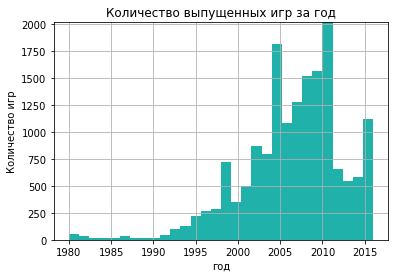

In [29]:
#Посмотрим, сколько игр выпускалось в разные годы
data['year_of_release'].plot(
    kind='hist',
    bins=30,
    title='Количество выпущенных игр за год',
    color='lightseagreen',
    grid=True,
    ylim=(0, data['year_of_release'].max()+1)
)
plt.ylabel('Количество игр'),
plt.xlabel('год');

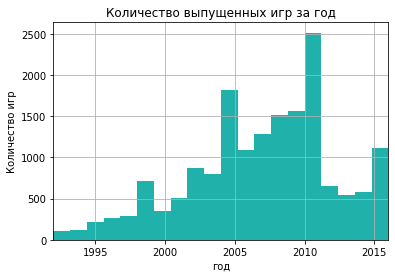

In [30]:
#Выберем данные с 1992 г - с начала роста выпуска игр
data['year_of_release'].plot(
    kind='hist',
    bins=30,
    title='Количество выпущенных игр за год',
    color='lightseagreen',
    grid=True,
    xlim=(1992, 2016)
)
plt.ylabel('Количество игр'),
plt.xlabel('год');

Данные представлены за 36 лет. Для составления актуального прогноза на следующий год нам не понядобятся все данные. \
Для определения актуального периода посмотрим, сколько зарабатала каждая платформа за каждый год. \
Затем определим, сколько в среднем работают платформы.\
На основании этих данных выберем период для анализа. 

In [31]:
#сделаем свод по выручке каждой плоатформы за каждый год
data_platform = data.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum')
data_platform

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,29.5,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.23,51.36,56.60,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,157.47,154.61,128.15,87.96,29.17,11.01,1.54,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#посмотрим, сколько лет в среднем держится платформа
#сделаем срез только по платформе и годам
data_plat = data[['platform', 'year_of_release']]
#удалим дубли
data_plat = data_plat.drop_duplicates()
#сделаем свод, сколько лет работает каждая платформа
data_plat_gr = data_plat.groupby(by='platform')['year_of_release'].count()
data_plat_gr

platform
2600    10
3DO      2
3DS      6
DC       7
DS      11
GB      13
GBA      8
GC       7
GEN      5
GG       1
N64      7
NES     12
NG       4
PC      26
PCFX     1
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
PSV      6
SAT      6
SCD      2
SNES    10
TG16     1
WS       3
Wii     11
WiiU     5
X360    12
XB       9
XOne     4
Name: year_of_release, dtype: int64

In [33]:
#посмотрим, сколько в среднем работает платформа
data_plat_gr.mean()

7.67741935483871

In [34]:
#выберем топ-20 платформ с максимальной выручкой
top_platforms = data.groupby(by='platform')['all_sales'].sum().sort_values(ascending=False).head(20)
top_platforms

platform
PS2     1347.76
X360    1039.79
PS3     1002.86
Wii      935.62
DS       848.31
PS       744.71
GBA      330.43
PSP      319.11
PS4      318.12
XB       273.25
PC       270.79
3DS      260.87
GB       254.43
NES      252.45
N64      218.85
GC       211.87
SNES     203.47
XOne     161.66
2600      87.10
WiiU      82.51
Name: all_sales, dtype: float64

In [35]:
#сделаем свод по каждой плоатформе и ее выручке за каждый год
sales_top_20 = pd.pivot_table(data.loc[data['platform'].isin(top_platforms.index)], 
                            index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
sales_top_20

platform,2600,3DS,DS,GB,GBA,GC,N64,NES,PC,PS,PS2,PS3,PS4,PSP,SNES,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,29.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,0.02,NaN,NaN,NaN,NaN,53.44,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,1.43,NaN,NaN,NaN,45.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


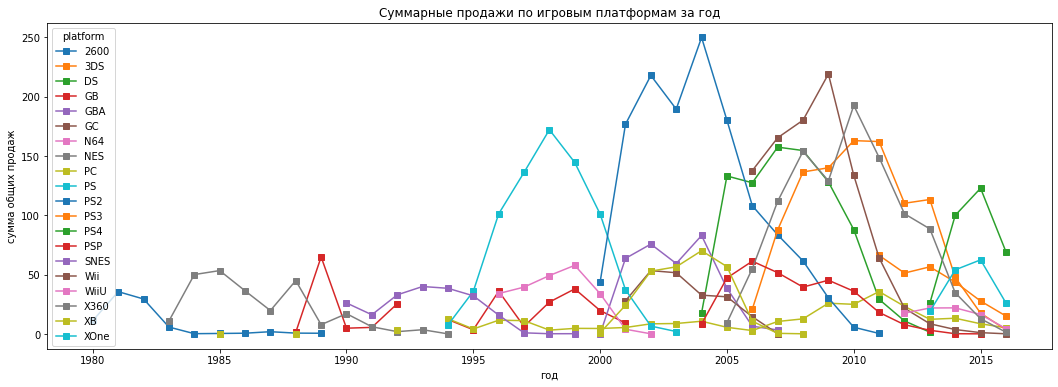

In [36]:
#посмотрим на графике 
sales_top_20.plot(figsize=(18,6),  marker = 's', title='Суммарные продажи по игровым платформам за год',
                 ylabel='сумма общих продаж', xlabel='год');

Многовато данных, к тому же часть платформ перестала существовать. Возьмем данные за последние 7 лет (по среднему сроку жизни платформ) и посмотрим распределение еще раз.

In [37]:
#сделаем свобдную по сумме продаж за последние 7 лет
sales_top = pd.pivot_table(data.loc[(data['platform'].isin(top_platforms.index)) & (data['year_of_release'] > 2009)], 
                            index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
sales_top

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2010,NaN,87.96,25.01,5.70,162.96,NaN,36.04,133.76,NaN,192.58,NaN
2011,66.23,29.17,35.76,0.45,162.17,NaN,18.19,64.12,NaN,148.72,NaN
2012,51.36,11.01,23.30,NaN,110.17,NaN,7.80,21.71,17.56,101.30,NaN
2013,56.60,1.54,12.38,NaN,113.34,25.99,3.14,8.62,21.92,88.59,18.96
2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.62,NaN,17.55,122.83,0.12,1.14,16.40,12.90,62.48
2016,15.14,NaN,5.25,NaN,3.60,69.30,NaN,0.18,4.60,1.52,26.15


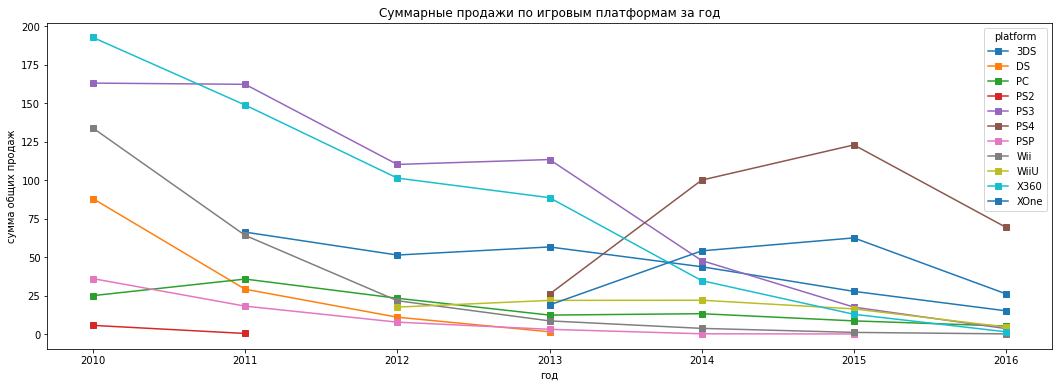

In [38]:
#посмотрим на графике 
sales_top.plot(figsize=(18,6),  marker = 's', title='Суммарные продажи по игровым платформам за год',
                 ylabel='сумма общих продаж', xlabel='год');

На графике видим, что платформы PS2 и DS закончили свою работу в 2011 и 2013 г, а платформы PS4 и XOne в 2013 только начали свою работу.
За актуальный период примем последние 3 года: 2014 - 2016, т.к. одна из целей исследования - выявить популярные продукты, а популярными игры остаются явно меньше 36 лет, представленных в исходных данных. Игровая индустрия непрерывно развивается, и игры 10-летней давности могут быть неактуальны на следующий год. Можно было бы сократить период до 3-х лет, но в этом случае у нас будет меньше данных для исследования в полтора раза, чем при пятилетнем периоде. 

In [39]:
#сделаем срез по данным с 2014 года
data2014 = data[data['year_of_release'] >= 2014]

In [40]:
sales_top2014 = pd.pivot_table(data2014, index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
sales_top2014

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.62,17.55,122.83,0.12,6.25,1.14,16.40,12.90,62.48
2016,15.14,5.25,3.60,69.30,NaN,4.25,0.18,4.60,1.52,26.15


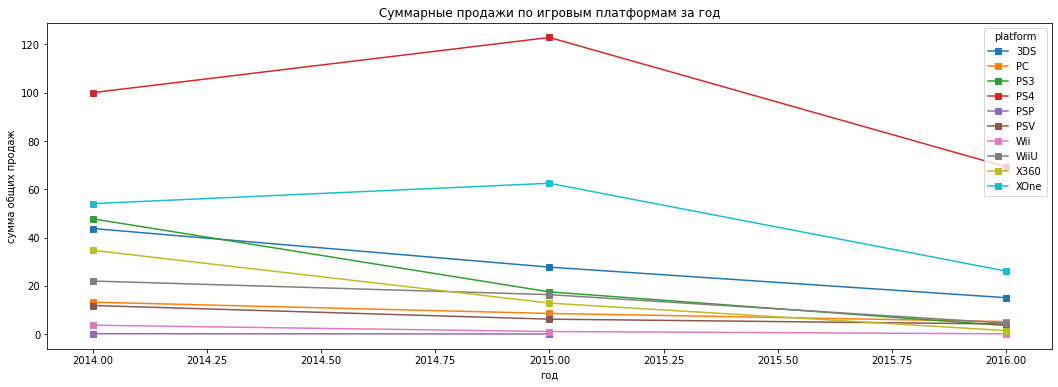

In [41]:
#посмотрим на графике 
sales_top2014.plot(figsize=(18,6),  marker = 's', title='Суммарные продажи по игровым платформам за год',
                 ylabel='сумма общих продаж', xlabel='год');

In [42]:
#посмотрим на суммарные продажи по платформам за последние 5 лет
data2014.groupby(by='platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS4     292.13
XOne    142.70
3DS      86.68
PS3      68.91
X360     49.16
WiiU     43.03
PC       27.15
PSV      22.40
Wii       5.07
PSP       0.36
Name: all_sales, dtype: float64

Потенциально прибыльные платформы - платформы, за последние 2 года имеющие положительную динамику в продажах (2014-2015, т.к. данные за 2016 неполные), суммарно за 3 лет продавшие более 100 млн копий:
* PS4;
* XOne.

PS3, 3DS, WiiU и PC имеют отрицательную динамику по продажам за последние несколько лет. Хотя WiiU можно дать шанс - падать по продажам они начали только в 2015. 

In [43]:
#посмотрим на распределение суммарных продаж по платформам
data2014.groupby(by='platform')['all_sales'].describe().transpose()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,212.000000,152.000000,220.000000,379.000000,13.000000,295.000000,11.000000,74.000000,112.000000,229.000000
mean,0.408868,0.178618,0.313227,0.770792,0.027692,0.075932,0.460909,0.581486,0.438929,0.623144
std,1.188368,0.328329,0.632243,1.617271,0.027735,0.141591,0.625451,1.155183,0.627947,1.050415
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030000,0.020000,0.040000,0.055000,0.010000,0.020000,0.035000,0.050000,0.070000,0.050000
50%,0.090000,0.060000,0.110000,0.180000,0.020000,0.040000,0.180000,0.190000,0.190000,0.210000
75%,0.250000,0.200000,0.332500,0.690000,0.020000,0.090000,0.755000,0.560000,0.530000,0.640000
max,11.680000,3.050000,5.270000,14.630000,0.090000,1.960000,2.010000,7.090000,4.280000,7.390000


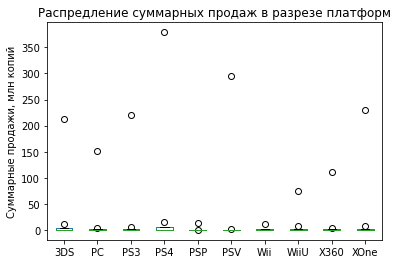

In [44]:
#посмотрим на графике
data2014.groupby(by='platform')['all_sales'].describe().transpose().plot(kind='box', 
          title='Распредление суммарных продаж в разрезе платформ', 
          ylabel = 'Суммарные продажи, млн копий');

Так себе график. Посмотрим только игры, которые продавались от 2 млн копий

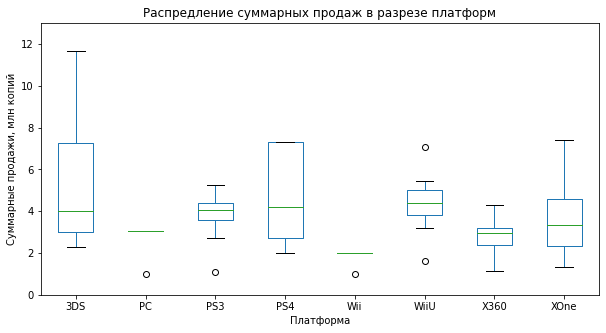

In [45]:
#построим график по играм с продажей более 2 млн копий
data2014[data2014['all_sales'] > 2].groupby(by='platform')['all_sales'].describe().transpose().plot(kind='box', 
          title='Распредление суммарных продаж в разрезе платформ', 
          ylabel = 'Суммарные продажи, млн копий',
          ylim=(0, 13), figsize=(10,5))
plt.xlabel('Платформа')
plt.show()

In [46]:
#посмотрим на распределение суммарных продаж по платформам с учетом ограничения по играм от 2 млн копий
data2014[data2014['all_sales'] > 2].groupby(by='platform')['all_sales'].describe().transpose()

platform,3DS,PC,PS3,PS4,Wii,WiiU,X360,XOne
count,10.000000,1.00,4.000000,40.000000,1.00,4.000000,3.000000,21.000000
mean,4.722000,3.05,4.152500,4.502000,2.01,4.902500,3.083333,3.409524
std,3.083093,NaN,1.067376,2.778607,NaN,1.619123,1.123937,1.329171
min,2.290000,3.05,2.700000,2.010000,2.01,3.210000,2.050000,2.170000
25%,2.772500,3.05,3.885000,2.472500,2.01,4.132500,2.485000,2.420000
50%,3.300000,3.05,4.320000,3.915000,2.01,4.655000,2.920000,3.230000
75%,6.327500,3.05,4.587500,4.887500,2.01,5.425000,3.600000,3.660000
max,11.680000,3.05,5.270000,14.630000,2.01,7.090000,4.280000,7.390000


По данным видно, что медиана суммарных продаж сильно не отличается по платформам, за исключением WiiU и PC3, у них медиана выше, чем у прочих. \
У платформ Wii, X360 и PC смедианы меньше прочих, их не следует рассматривать  в качестве партнеров на следущий год. \
У многих платформ есть звездные игры, число продаж которых сильно выбивается из статистики, самые прибыльные были на платформах PS4, 3DS.

Посмотрим, как влияют отзывы пользователей и критиков на продажи на примере самой популярной PS4.

In [47]:
#сделаем срез по платформе PS4
ps4 = data2014[data2014['platform'] == 'PS4']

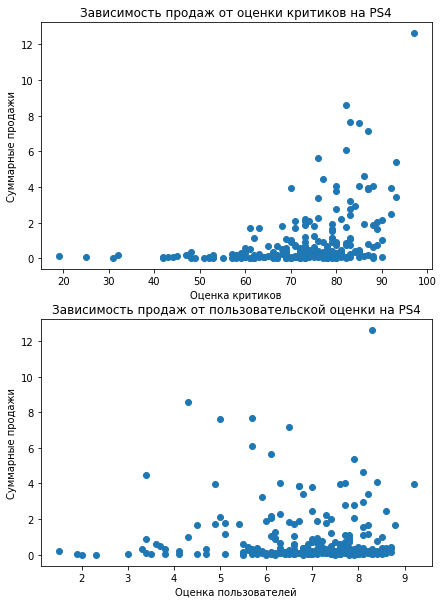

In [48]:
#посмотрим на диаграмму рассеяния 
fig, ax = plt.subplots(2, figsize=(7, 10))

ax[0].scatter(x = ps4['critic_score'], y = ps4['all_sales'])
ax[0].set_xlabel("Оценка критиков")
ax[0].set_ylabel("Суммарные продажи")
ax[0].set_title('Зависимость продаж от оценки критиков на PS4')

ax[1].scatter(x = ps4['user_score'], y = ps4['all_sales'])
plt.xlabel("Оценка пользователей")
plt.ylabel("Суммарные продажи")
plt.title('Зависимость продаж от пользовательской оценки на PS4');

In [49]:
#посмотрим в цифрах
ps4_corr = ps4.corr()
ps4_corr['all_sales']

year_of_release   -0.215242
na_sales           0.925291
eu_sales           0.955244
jp_sales           0.535746
other_sales        0.998151
critic_score       0.408473
user_score        -0.040786
all_sales          1.000000
Name: all_sales, dtype: float64

В качестве перспективнх платформ мы выбрали еще и XOne, посмотрим, зависят ли продажи от отзывов на этой платформе

In [50]:
#сделаем срез по платформе XOne
XOne = data2014[data2014['platform'] == 'XOne']

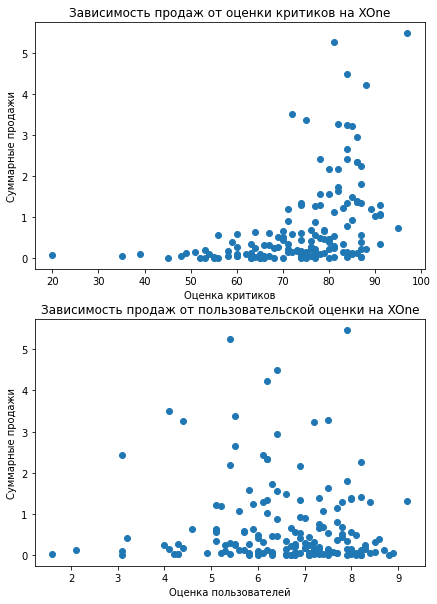

In [51]:
#посмотрим на диаграмму рассеяния 
fig, ax = plt.subplots(2, figsize=(7, 10))

ax[0].scatter(x = XOne['critic_score'], y = XOne['all_sales'])
ax[0].set_xlabel("Оценка критиков")
ax[0].set_ylabel("Суммарные продажи")
ax[0].set_title('Зависимость продаж от оценки критиков на XOne')

ax[1].scatter(x = XOne['user_score'], y = XOne['all_sales'])
plt.xlabel("Оценка пользователей")
plt.ylabel("Суммарные продажи")
plt.title('Зависимость продаж от пользовательской оценки на XOne');

In [52]:
#посмотрим в цифрах
XOne_corr = XOne.corr()
XOne_corr['all_sales']

year_of_release   -0.230977
na_sales           0.968704
eu_sales           0.891443
jp_sales           0.456256
other_sales        0.995012
critic_score       0.433835
user_score        -0.072579
all_sales          1.000000
Name: all_sales, dtype: float64

In [53]:
#останется ли корреляция такой же во всем наборе данных?
data2014.corr()['all_sales']

year_of_release   -0.117032
na_sales           0.912443
eu_sales           0.913405
jp_sales           0.416042
other_sales        0.935244
critic_score       0.332353
user_score        -0.014005
all_sales          1.000000
Name: all_sales, dtype: float64

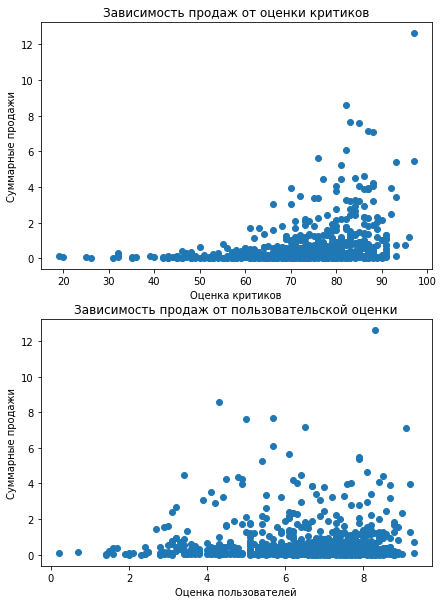

In [54]:
#посмотрим на диаграмму рассеяния 
fig, ax = plt.subplots(2, figsize=(7, 10))

ax[0].scatter(x = data2014['critic_score'], y = data2014['all_sales'])
ax[0].set_xlabel("Оценка критиков")
ax[0].set_ylabel("Суммарные продажи")
ax[0].set_title('Зависимость продаж от оценки критиков')

ax[1].scatter(x = data2014['user_score'], y = data2014['all_sales'])
plt.xlabel("Оценка пользователей")
plt.ylabel("Суммарные продажи")
plt.title('Зависимость продаж от пользовательской оценки');

Вывод: пользовательская оценка не влияет на количество продаж. Оценка критиков имеет прямую среднюю связь с суммарными продажами как на выбранных платформах, так и в целом по датасету.

In [55]:
#посмотрим на продажи по жанрам игр
data2014_group = data2014.groupby(by='genre').agg({"all_sales": ['sum','mean', 'median', 'count']}).\
    sort_values(('all_sales',  'sum'), ascending=False)
data2014_group

all_sales                       
                   sum      mean median count
genre                                        
Action          199.52  0.320772  0.090   622
Shooter         170.94  1.335469  0.515   128
Sports          117.46  0.707590  0.200   166
Role-Playing    101.44  0.459005  0.110   221
Misc             37.55  0.332301  0.090   113
Fighting         28.22  0.470333  0.125    60
Racing           27.52  0.398841  0.090    69
Platform         18.09  0.476053  0.140    38
Adventure        17.55  0.094865  0.030   185
Simulation       13.13  0.298409  0.100    44
Strategy          3.96  0.107027  0.060    37
Puzzle            2.21  0.157857  0.045    14

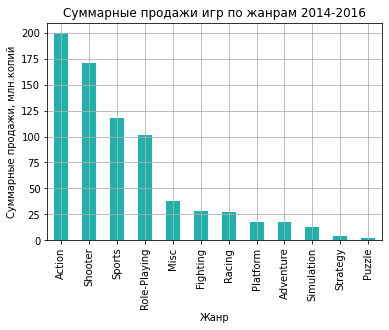

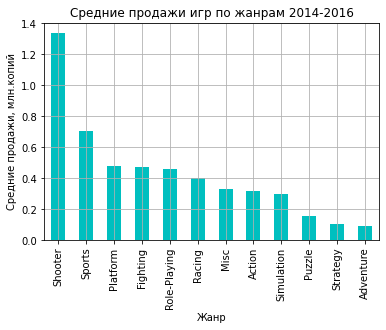

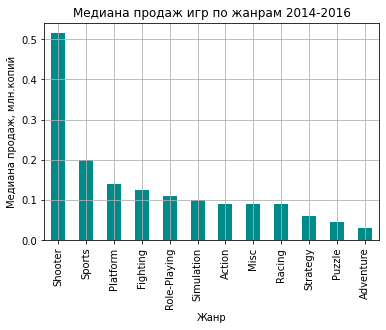

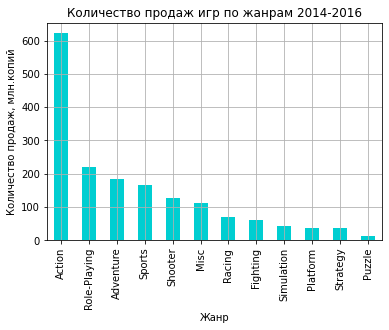

In [56]:
data2014_group[('all_sales',  'sum')].plot(
    kind='bar',
    title='Суммарные продажи игр по жанрам 2014-2016',
    xlabel='Жанр',
    ylabel='Суммарные продажи, млн.копий',
    color='lightseagreen',
    grid=True
);

plt.show()

data2014_group[('all_sales',  'mean')].sort_values(ascending=False).plot(
    kind='bar',
    title='Средние продажи игр по жанрам 2014-2016',
    xlabel='Жанр',
    ylabel='Средние продажи, млн.копий',
    color='c',
    grid=True);

plt.show()

data2014_group[('all_sales',  'median')].sort_values(ascending=False).plot(
    kind='bar',
    title='Медиана продаж игр по жанрам 2014-2016',
    xlabel='Жанр',
    ylabel='Медиана продаж, млн.копий',
    color='darkcyan',
    grid=True);

plt.show()

data2014_group[('all_sales',  'count')].sort_values(ascending=False).plot(
    kind='bar',
    title='Количество продаж игр по жанрам 2014-2016',
    xlabel='Жанр',
    ylabel='Количество продаж, млн.копий',
    color='darkturquoise',
    grid=True);

plt.show()

Самые популярные жанры игр по суммарным продажам:
1. Action - экшен, боевик;
2. Shooter - шутер, стрелялки;
3. Sports - спортивные игры;
4. Role-Playing - RPG, ролевая игра.

Самые непопулярные жанры:
1. Puzzle - головоломки;
2. Strategy - стратегия;
3. Simulation - симуляторы.

Больше всего продаются экшены, дороже - шутеры. 


*Грустно, но факт - игры, требующие включения мозгов, становятся менее популярными, чем игры, направленные на убить/победить.*

Выводы: 
1. Рост количества выпускаемых игр наблюдается с 1995 г, в 2010-2011 гг. достигая своего максимума, затем идет на спад;
2. Средний срок жизни игровой платформы - 7,7 лет;
3. Актуальный период для анализа определен как последние 5 лет: 2012-2016 гг.;
4. Потенциально прибыльные платформы за этот период:
* PS4;
* XOne.

Эти платформы имеют положительную динамику в продажах (2012-2015, т.к. данные за 2016 неполные), суммарно за 5 лет продали более 50 млн копий.

5. Высокая оценка критиков средне, но положительно влияет на общие продажи;
6. Самые популярные жанры игр по суммарным продажам:
* Action - экшен, боевик;
* Shooter - шутер, стрелялки;
* Sports - спортивные игры;
* Role-Playing - RPG, ролевая игра.

7. Больше всего продаются экшены, но дороже - шутеры. 

## Портрет пользователя по регионам

In [57]:
#посмотрим на распределение продаж по платформам и регионам
portrait_platform = data2014.groupby(by='platform')['na_sales', 'eu_sales', 'jp_sales', 'all_sales'].\
    sum().sort_values('all_sales', ascending=False)
portrait_platform

,na_sales,eu_sales,jp_sales,all_sales
platform,,,,
PS4,101.14,130.75,15.05,292.13
XOne,83.22,46.40,0.32,142.70
3DS,22.64,16.12,44.24,86.68
PS3,22.50,25.66,11.25,68.91
X360,29.09,15.54,0.08,49.16
WiiU,19.39,13.17,7.31,43.03
PC,7.26,18.03,0.00,27.15
PSV,2.52,3.53,14.54,22.40
Wii,2.08,2.59,0.00,5.07


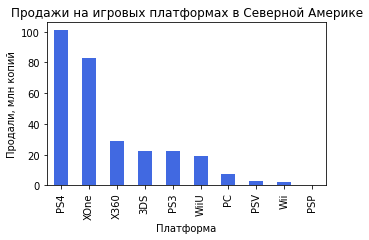

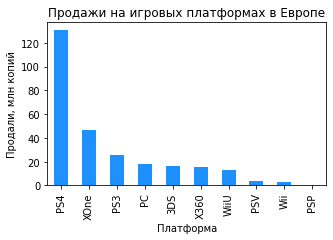

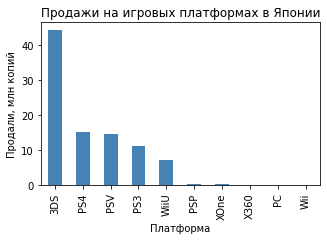

In [58]:
#перенесем на графики
portrait_platform['na_sales'].sort_values(ascending=False).plot(
    kind='bar', 
    figsize=(5, 3), 
    title='Продажи на игровых платформах в Северной Америке', 
    ylabel='Продали, млн копий', 
    xlabel='Платформа',
    color='royalblue');
plt.show()

portrait_platform['eu_sales'].sort_values(ascending=False).plot(
    kind='bar', 
    figsize=(5, 3), 
    title='Продажи на игровых платформах в Европе', 
    ylabel='Продали, млн копий', 
    xlabel='Платформа',
    color='dodgerblue');
plt.show()

portrait_platform['jp_sales'].sort_values(ascending=False).plot(
    kind='bar', 
    figsize=(5, 3), 
    title='Продажи на игровых платформах в Японии', 
    ylabel='Продали, млн копий', 
    xlabel='Платформа',
    color='steelblue');
plt.show()

In [59]:
#посмотрим на распределение продаж по жанрам и регионам
portrait_genre = data2014.groupby(by='genre')['na_sales', 'eu_sales', 'jp_sales', 'all_sales'].\
    sum().sort_values('all_sales', ascending=False)
portrait_genre

,na_sales,eu_sales,jp_sales,all_sales
genre,,,,
Action,72.60,74.75,29.58,199.52
Shooter,79.02,65.52,4.87,170.94
Sports,51.84,46.77,3.32,117.46
Role-Playing,33.47,28.17,31.16,101.44
Misc,15.05,12.86,5.61,37.55
Fighting,12.43,6.69,6.37,28.22
Racing,8.74,14.13,1.76,27.52
Platform,6.79,6.80,2.69,18.09
Adventure,5.64,6.49,3.60,17.55


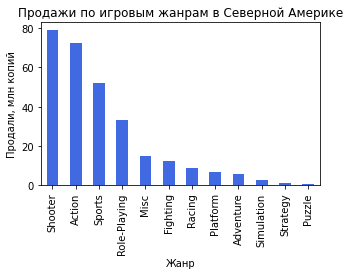

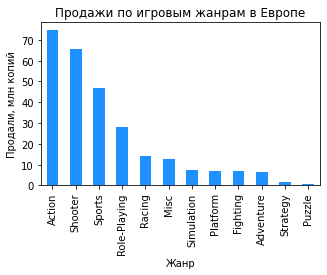

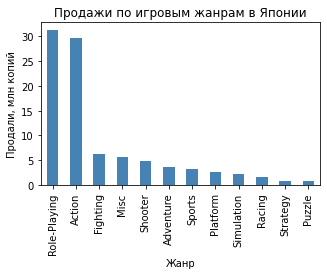

In [60]:
#перенесем на графики
portrait_genre['na_sales'].sort_values(ascending=False).plot(
    kind='bar', 
    figsize=(5, 3), 
    title='Продажи по игровым жанрам в Северной Америке', 
    ylabel='Продали, млн копий', 
    xlabel='Жанр',
    color='royalblue');
plt.show()

portrait_genre['eu_sales'].sort_values(ascending=False).plot(
    kind='bar', 
    figsize=(5, 3), 
    title='Продажи по игровым жанрам в Европе', 
    ylabel='Продали, млн копий', 
    xlabel='Жанр',
    color='dodgerblue');
plt.show()

portrait_genre['jp_sales'].sort_values(ascending=False).plot(
    kind='bar', 
    figsize=(5, 3), 
    title='Продажи по игровым жанрам в Японии', 
    ylabel='Продали, млн копий', 
    xlabel='Жанр',
    color='steelblue');
plt.show()

In [61]:
#посмотрим на распределение продаж по рейтингу ESRB и регионам
portrait_rating = data2014.groupby(by='rating')['na_sales', 'eu_sales', 'jp_sales', 'all_sales'].\
    sum().sort_values('all_sales', ascending=False)
portrait_rating

,na_sales,eu_sales,jp_sales,all_sales
rating,,,,
M,103.44,100.99,8.55,244.17
E,52.05,58.49,9.01,135.20
T,40.30,35.35,16.28,103.70
E10+,39.08,28.43,4.80,81.49


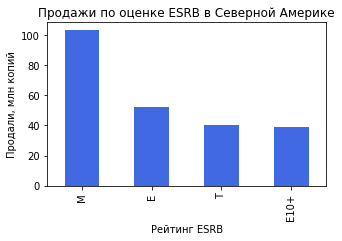

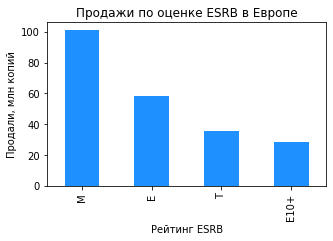

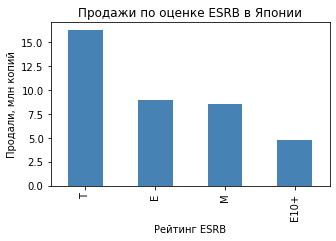

In [62]:
#перенесем на графики
portrait_rating['na_sales'].sort_values(ascending=False).plot(
    kind='bar', 
    figsize=(5, 3), 
    title='Продажи по оценке ESRB в Северной Америке', 
    ylabel='Продали, млн копий', 
    xlabel='Рейтинг ESRB',
    color='royalblue');
plt.show()

portrait_rating['eu_sales'].sort_values(ascending=False).plot(
    kind='bar', 
    figsize=(5, 3), 
    title='Продажи по оценке ESRB в Европе', 
    ylabel='Продали, млн копий', 
    xlabel='Рейтинг ESRB',
    color='dodgerblue');
plt.show()

portrait_rating['jp_sales'].sort_values(ascending=False).plot(
    kind='bar', 
    figsize=(5, 3), 
    title='Продажи по оценке ESRB в Японии', 
    ylabel='Продали, млн копий', 
    xlabel='Рейтинг ESRB',
    color='steelblue');
plt.show()

<b>Выводы:


Потрет игрока в Северной Америке:</b>
1. ТОП-5 популярных платформ:
* PS4
* XOne
* X360
* 3DS
* PS3

2. ТОП-5 популярных жанров: 
* Shooter
* Action
* Sports
* Role-Playing
* Misc
3. Самые популярные игры с рейтингом M - 17+.


<b>Потрет игрока в Европе: </b>
1. ТОП-5 популярных платформ:
* PS4
* XOne
* PS3
* PC
* 3DS

2. ТОП-5 популярных жанров: 
* Action
* Shooter
* Sports
* Role-Playing
* Racing           
3. Самые популярные игры с рейтингом M - 17+.

<b>Потрет игрока в Яплнии:</b>
1. ТОП-5 популярных платформ:
* 3DS
* PS4
* PSV
* PS3
* WiiU

2. ТОП-5 популярных жанров: 
* Role-Playing
* Action
* Fighting
* Misc
* Shooter
3. Самые популярные игры с рейтингом T - 13+.

Подводя итог, можно сказать, что пользователи в Северной Америке и Европе имеют очень похжие игровые предпочтения, имеющие незначительные различия по жанрам: например, в ТОП-5 рейтинга европейцев входят гонки, в отличие от американцев.

Портрет же японского игрока сильно отличается от предыдущих двух регионов. предположительно, влияет менталитет и японские аниме - игры они предпочитают в мультяшном стиле (больше всего продаж игр с рейтингом 13+), в их ТОП-5 входят драки, а платформы, которые не находят популярности в Америке и Европе, у них в ТОП-5 (PSV, WiiU).

## Проверка гипотез

<b>Гипотеза:</b> средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Для ее проверки определим нулевую и альтернативную гипотезы. 

Нулевая гипотеза: средний пользовательский рейтинг платформ Xbox One равен среднему пользовательскому рейтингу PC.
Альтернативная гипотеза: средний пользовательский рейтинг платформ Xbox One равен среднему пользовательскому рейтингу PC.

In [63]:
#найдем среднюю оценку пользователей на нужных платформах
print('Средний пользовательский рейтинг платформы PS4 - ', 
      round(data2014.loc[data2014['platform'] == 'PS4']['user_score'].mean(), 2))
print('Средний пользовательский рейтинг платформы Xbox One - ', 
      round(data2014.loc[data2014['platform'] == 'XOne']['user_score'].mean(), 2))

Средний пользовательский рейтинг платформы PS4 -  6.83
Средний пользовательский рейтинг платформы Xbox One -  6.59


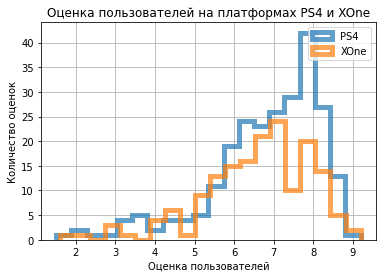

In [64]:
#посмотрим распределение пользовательских оценок на графике
ax = data2014.loc[data2014['platform'] == 'PS4'].plot(
    kind='hist',
    y='user_score',
    histtype='step',
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='PS4',
)
data2014.loc[data2014['platform'] == 'XOne'].plot(
    kind='hist',
    y='user_score',
    histtype='step',
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='XOne',
    ax=ax,
    grid=True,
    legend=True,
)
plt.ylabel('Количество оценок')
plt.xlabel('Оценка пользователей')
plt.title('Оценка пользователей на платформах PS4 и XOne');

Для проверк гипотез будем использовать метод st.ttest_ind, т.к. сравниваем две независимые между собой выборки - оценки пользователей на разных платформах не зависят друг от друга

In [65]:
#уровень статистической значимости возьмем за 1%
alpha = 0.01 

results = st.ttest_ind(data2014.loc[(data2014['platform'] == 'PS4') & (data2014['user_score'].notna())]['user_score'], 
                       data2014.loc[(data2014['platform'] == 'XOne') & (data2014['user_score'].notna())]['user_score'],
                       alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.04541224227169167
Не получилось отвергнуть нулевую гипотезу


Попробуем провести такой же тест, но только для 2016 года - с течением времени средние оценки становятся ближе друг к другу или нет? 

In [66]:
#уровень статистической значимости возьмем за 1%
alpha = 0.01 

results = st.ttest_ind(data2014.loc[(data2014['platform'] == 'PS4') & (data2014['user_score'].notna()) & (data2014['year_of_release'] == 2016)]['user_score'], 
                       data2014.loc[(data2014['platform'] == 'XOne') & (data2014['user_score'].notna()) & (data2014['year_of_release'] == 2016)]['user_score'],
                       alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.12120077684968168
Не получилось отвергнуть нулевую гипотезу


Вывод: при уровне статистической значимости, равному 1%, можно сделать вывод, что средние пользоательские рейтинги на платформах PS4 и XOne равны.

Вывод №2 = в последнее время (2016 год) среднее значение рейтинга на платформе PS4 еще ближе к средней пользовательской оценки платформы XOne. Даже увеличив уровень статистической значимости до 5%, отвергнуть гипотезу не сможем, а значит, можем сделать вывод, что средние рейтинги пользователей равны. 

<b>Гипотеза:</b> средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.
Альтернативная гипотеза: средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

Нулевая гипотеза сформулирвоана таким образом, чтобы выявить, насколько велико отклонение среднего между жанрами и при его наличии отвергнуть ее в пользу альтернативной, которую и хотим проверить.

In [67]:
#найдем среднюю оценку пользователей в выбранных жанрах
print('Средний пользовательский рейтинг Action - ', 
      round(data2014.loc[data2014['genre'] == 'Action']['user_score'].mean(), 2))
print('Средний пользовательский рейтинг Sports - ', 
      round(data2014.loc[data2014['genre'] == 'Sports']['user_score'].mean(), 2))

Средний пользовательский рейтинг Action -  6.76
Средний пользовательский рейтинг Sports -  5.23


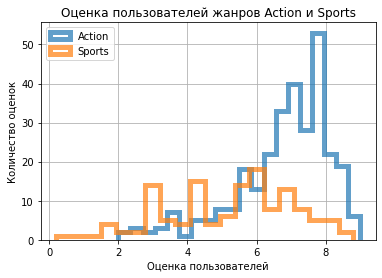

In [68]:
#посмотрим распределение пользовательских оценок на графике
ax = data2014.loc[data2014['genre'] == 'Action'].plot(
    kind='hist',
    y='user_score',
    histtype='step',
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='Action',
)
data2014.loc[data2014['genre'] == 'Sports'].plot(
    kind='hist',
    y='user_score',
    histtype='step',
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='Sports',
    ax=ax,
    grid=True,
    legend=True,
)
plt.ylabel('Количество оценок')
plt.xlabel('Оценка пользователей')
plt.title('Оценка пользователей жанров Action и Sports');

По данным графика видно, что Action пользователи любят больше. Проверим с помощью статистического теста.

In [69]:
#уровень статистической значимости возьмем за 5%
alpha = 0.05

results = st.ttest_ind(data2014.loc[(data2014['genre'] == 'Action') & (data2014['user_score'].notna())]['user_score'], 
                       data2014.loc[(data2014['genre'] == 'Sports') & (data2014['user_score'].notna())]['user_score'],
                       alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.006671732343028e-20
Отвергаем нулевую гипотезу


Проведем аналогичный тест для 2016 года - изменились ли предпочтения пользователей в жанрах в последнее время? 

In [70]:
#проведем аналогичный тест для 2016 года
alpha = 0.05

results = st.ttest_ind(data2014.loc[(data2014['genre'] == 'Action') & (data2014['year_of_release'] == 2016) & (data2014['user_score'].notna())]['user_score'], 
                       data2014.loc[(data2014['genre'] == 'Sports') & (data2014['year_of_release'] == 2016) & (data2014['user_score'].notna())]['user_score'],
                       alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.00015355727685438942
Отвергаем нулевую гипотезу


Даже увеличив уровень статистической значимости до 5%, мы не смогли подтвердить нулевую гипотезу о равной средней оценке пользователей в выбранных жанрах и отвергаем ее в пользу альтернативной - средние оценки не равны.
При проведении теста на данных 2016 года мы видим, что средние стали чуть ближе друг к другу, но все еще недостаточно для принятия нулевой гипотезы. 

Вывод: средние пользовательские оценки жанров Action и Sports не равны. 

## Выводы

<b>На этапе предобраюотки данных:</b>
    
1. заменены типы данных в столбцах: 
* год выпуска;
* оценка пользователей. В этом столбце значения 'tbd' заменены на пустые, исходя из предположения, что издатель не захотел получать оценку. 
2. обработы пропуски в столбцах:
* название игры - пропуски удалены;
* оценка ESRB - чать пропусков заменена на соответствующие значения рейтинга для игры, указанные на друой платформе. 
3. Посчитаны суммарные продажи игр во всех регионах.

<b>Исследовательский анализ данных показал: </b>
1. Рост количества выпускаемых игр наблюдается с 1995 г, в 2010-2011 гг. достигая своего максимума, затем идет на спад;
2. Средний срок жизни игровой платформы - 7,7 лет;
3. Актуальный период для анализа определен как последние 3 года: 2014-2016 гг.;
4. Потенциально прибыльные платформы за этот период:
* PS4;
* XOne.

Эти платформы имеют положительную динамику в продажах (2012-2015, т.к. данные за 2016 неполные), суммарно за 5 лет продали более 50 млн копий.

5. Высокая оценка критиков средне, но положительно влияет на общие продажи;
6. Самые популярные жанры игр:
* Action - экшен, боевик;
* Shooter - шутер, стрелялки;
* Role-Playing - RPG, ролевая игра;
* Sports - спортивные игры.

<b>Портреты пользователей в регионах:</b>

Пользователи в Северной Америке и Европе имеют очень похжие игровые предпочтения, имеющие незначительные различия по жанрам: например, в ТОП-5 рейтинга европейцев входят гонки, в отличие от американцев.

Портрет же японского игрока сильно отличается от предыдущих двух регионов. предположительно, влияет менталитет и японские аниме - игры они предпочитают в мультяшном стиле (больше всего продаж игр с рейтингом 13+), в их ТОП-5 входят драки, а платформы, которые не находят популярности в Америке и Европе, у них в ТОП-5 (PSV, WiiU).

<b>Проверка гипотез</b> показала, что:
1. Средние оценки пользователей платформ PS4 и Xbox One равны;
2. Средние оценки пользователей жанров Action и Sports смльно отличаются друг от друга.